# Classifier des images de vêtements

Ce TP est ~~pompé~~ tiré de la documentation de la librairie Tensorflow, n'hésitez pas à y jeter un oeil, elle est plutôt bien faite ! Il vous faudra installer la librairie tensorflow, ainsi que les librairies numpy et matplotlib (pip install ...)

On va classifier des images de vêtements (pantalons, sneakers...).

In [200]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Importer le jeu de données

On va utiliser le jeu de données [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) qui contient 70000 images dans 10 catégories. Chaque image montre un vêtement dans une résolution basse :

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Le problème de classifier les images de vêtements est un peu plus compliqué que celui de classifier des images de chiffre, ce qui le rend plus intéressant !

In [201]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Question

Pourquoi les variables sont-elles séparées en _train_ et en _test_ ? Il faut se rappeler du cours de Machine Learning !

Les *labels* sont des entiers entre 0 et 9. Ces entiers correspondent à la _classe_ du vêtement :

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Puisque les noms des classes ne sont pas inclus dans le jeu de données, nous les stockons dans une variable pour plus tard :

In [202]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration des données

Explorons rapidement la structure du jeu de données avant de nous lancer dans l'entraînement du modèle.

### Questions

Combien y a-t-il d'images dans le jeu de données d'entraînement ? Et dans le jeu de données de test ? Quelle est la résolution de ces images ?

In [203]:
print(np.shape(train_images))
print(np.shape(test_images))


(60000, 28, 28)
(10000, 28, 28)


## Préparation des données

### Question

Affichez quelques images du jeu d'entraînement à l'aide de la fonction `imshow` de matplotlib. Quelle est la valeur minimale qu'un pixel peut prendre ? Et la valeur maximale ?

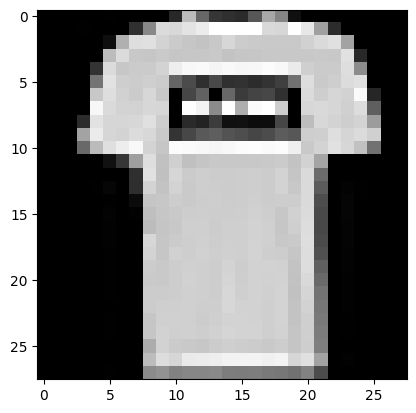

255


In [204]:
# À compléter
plt.imshow(train_images[1], cmap='gray')
plt.show()

train_images[0][0]

minPix = train_images.min()
maxPix = train_images.max()

print(train_images.max())

## Question

Normalisez les données d'entraînement et de test pour que les valeurs des pixels soient entre 0 et 1. En quoi cela peut-il être utile ? Si vous n'êtes pas sûr après quelques recherches internet, vous pouvez passer cette question. Vous pouvez aussi vous convaincre de l'utilité de ce procédé en exécutant deux fois ce notebook, une fois en normalisant les données, une fois sans les normaliser, et en comparant les résultats.

In [205]:
# À compléter

# train_images = (train_images / maxPix)

# scaled_data = (train_images - minPix) / (maxPix - minPix)
# print(scaled_data[0])

normalized_data_train = tf.keras.utils.normalize(train_images, axis=1)
normalized_data_test = tf.keras.utils.normalize(test_images, axis=1)

print(normalized_data_train[0])
print(normalized_data_test[0])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00135942 0.    

### Question

Pour nous assurer que les images sont dans le bon format avant de commencer, afficher les 25 premières images du jeu d'entraînement avec leurs noms de classe correspondant en dessous.

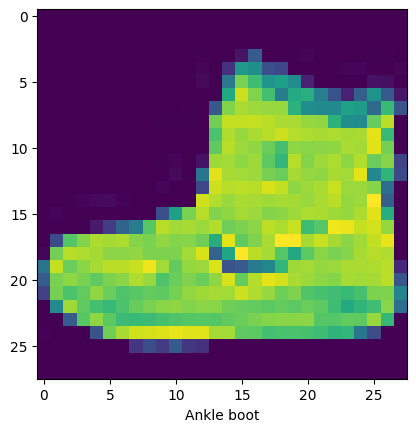

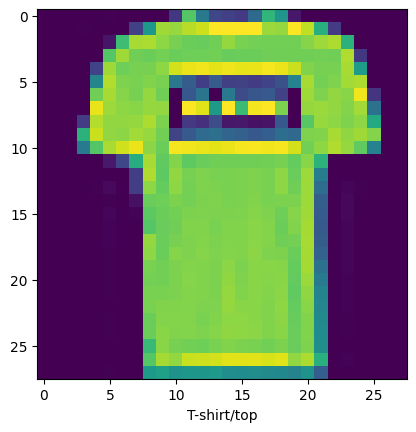

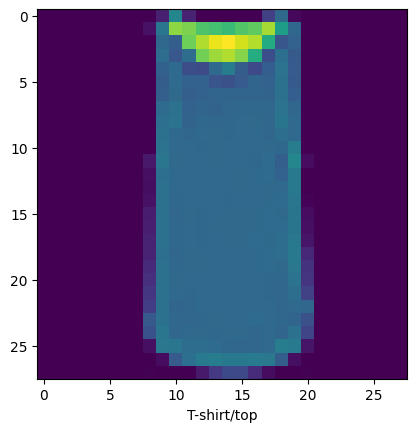

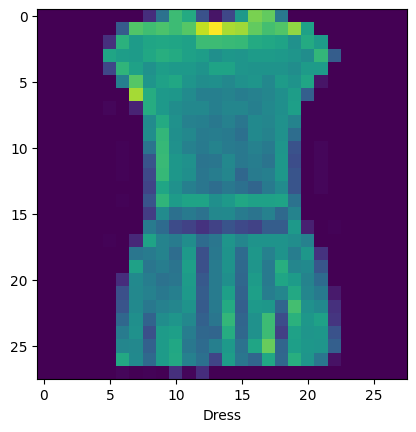

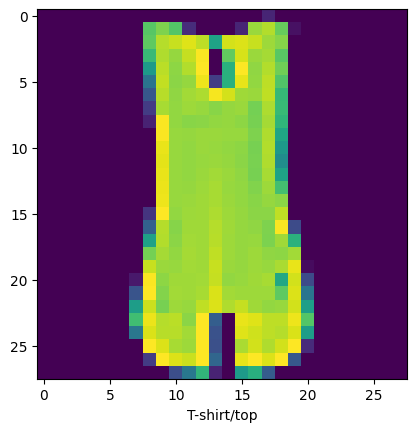

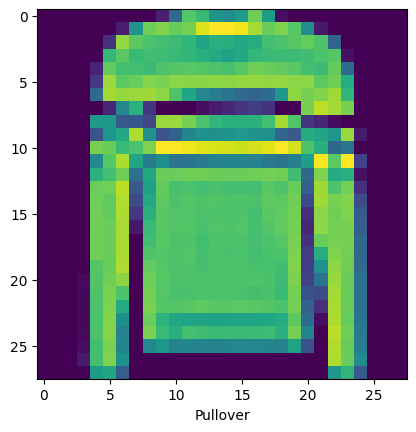

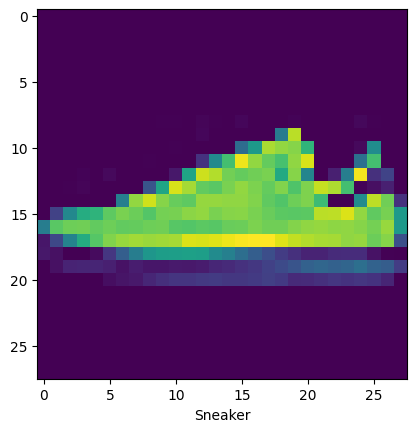

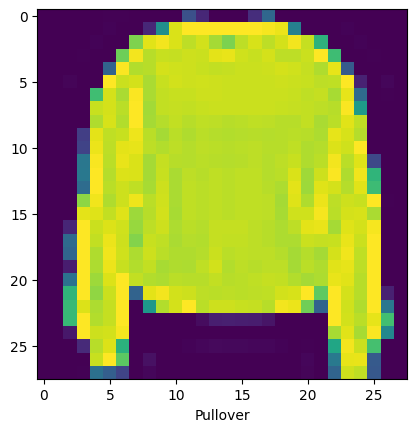

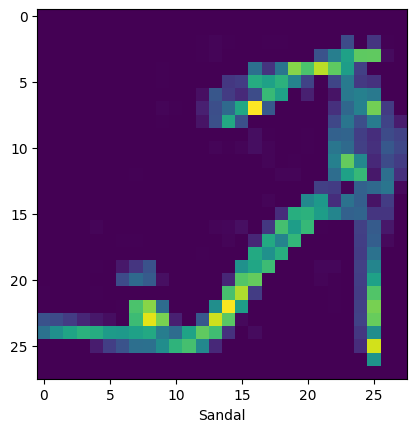

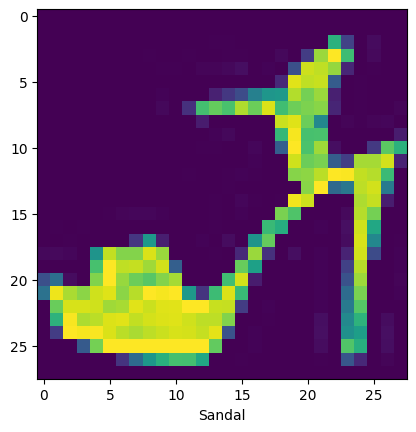

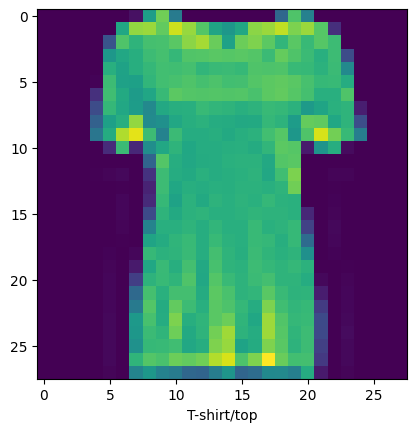

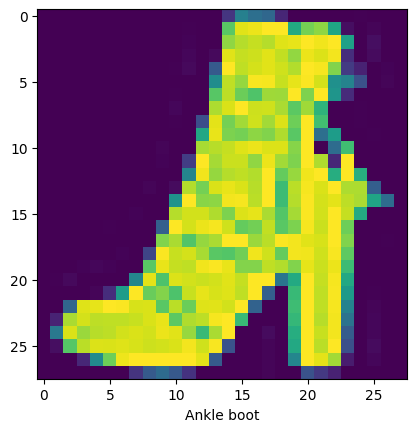

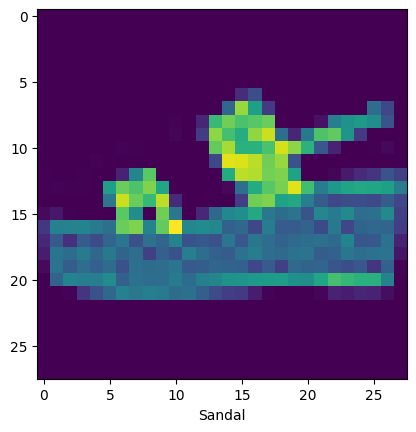

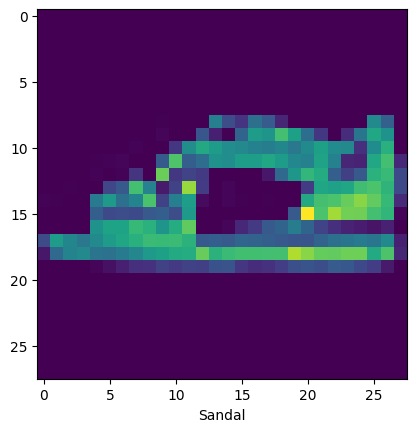

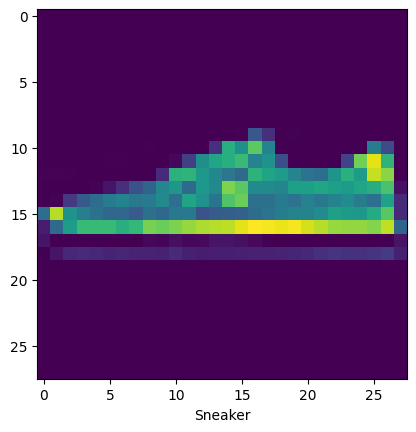

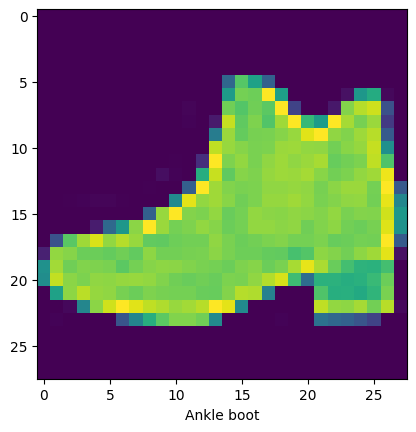

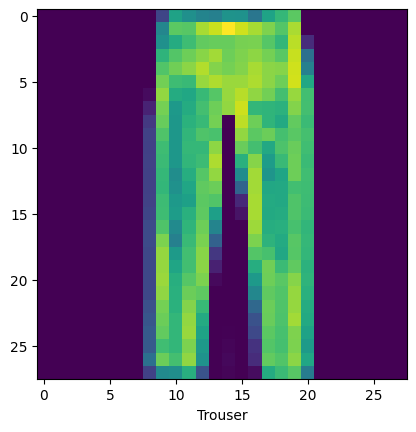

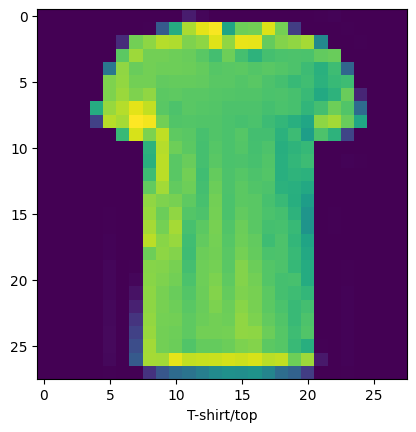

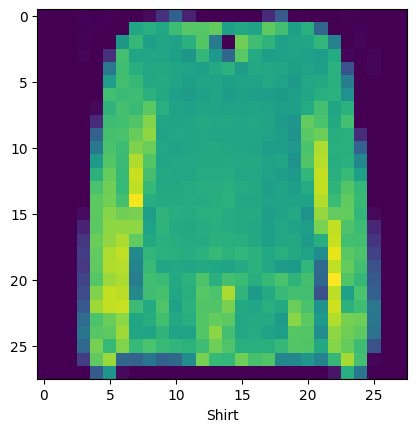

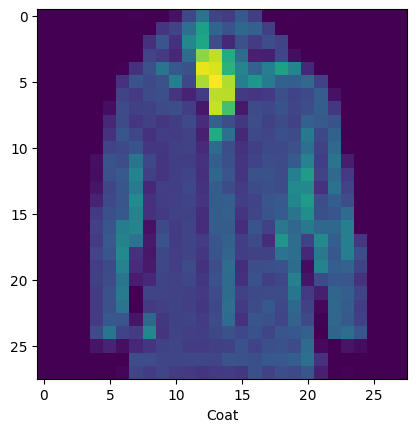

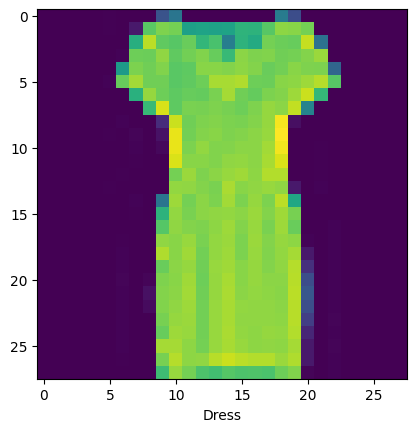

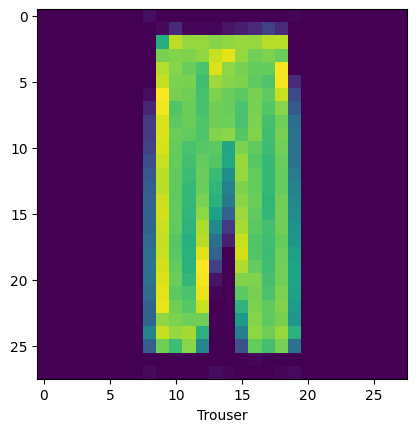

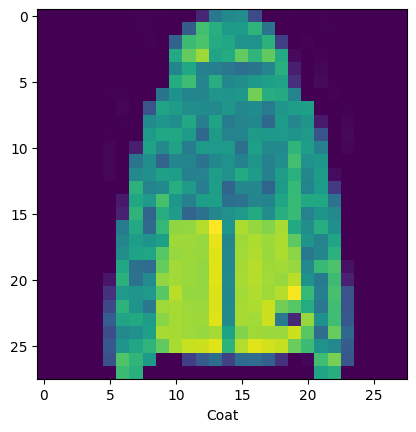

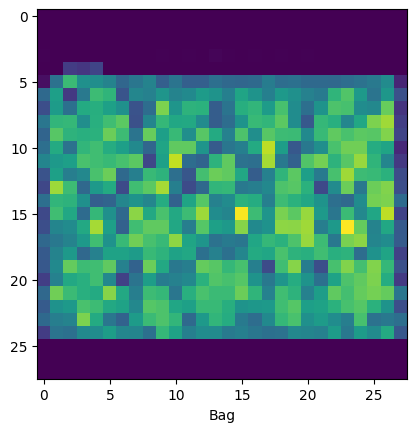

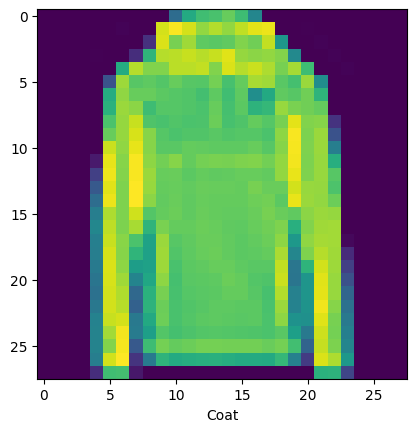

In [206]:
# À compléter
for i in range(25):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()


In [214]:
normalized_data_train.shape

(60000, 28, 28)

## Construction du modèle

Construire le réseau de neurone consiste à assembler ses couches, puis à compiler le modèle.

### Assembler les couches

Le deep learning consiste principalement à enchaîner ensemble des couches simples. La plupart des couches, telles que `tf.keras.layers.Dense`, ont des paramètres qui sont appris durant l'apprentissage.

#### Question

À l'aide de l'API `tf.keras.Sequential`, créez un modèle à trois couches : une première couche qui "applatit" les images 28x28 pour en faire des vecteurs de taille 784 ("Flatten"), une deuxième couche de 128 neurone intermédiaire qui sont tous connectés à la première couches ("Dense") et qui ont pour fonction d'activation "relu", et finalement une troisième couche "Dense" de 10 neurones qui ont pour fonction d'activation une sigmoïde.

Pourquoi la dernière couche comprend-elle 10 neurones ?

In [252]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)

# y = model(train_images)

model.summary()



Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiler le modèle

Avant de pouvoir entraîner le modèle, il faut ajouter quelques réglages. Ces réglages sont ajoutés durant la _compilation_ du modèle :

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — C'est la méthode grâce à laquelle le modèle apprend ses poids et ses biais (par exemple : la descente de gradient stochastique).
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — Aussi appelée "fonction coût" ou "fonction de perte", c'est la fonction qui mesure à quel point notre modèle est bon (ou mauvais). C'est cette fonction qui va être minimisée par l'optimizer.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — Ce sont des fonctions qui nous servent à suivre l'entraînement du modèle. Par exemple, l'_accuracy_ est le pourcentage d'image correctement classifié.

#### Question

Choisissez un optimizer et une fonction de perte pour compiler votre modèle :

In [253]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Entraîner le modèle

Entraîner un réseau de neurone s'effectue en plusieurs étapes :
1. Donner les données d'entraînement au modèle (on dit parfois qu'on "nourrit" le modèle). Dans notre cas, les données d'entraînement sont dans les tableaux `train_images` et `train_labels`.
2. Le modèle apprend à associer les images à des labels.
3. On demande au modèle de faire une prédictions sur des images de test, dans notre cas celles qui sont dans le tableau `test_images`.
4. On vérifie que les prédictions correspondent aux réponses dans le tableau `test_labels`.


### Nourrir le modèle

Pour entraîner le modèle, appelez la fonction [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) sur 10 époques. Ne vous inquiétez pas si ça prend un peu de temps !

In [254]:
# À compléter

model.fit(normalized_data_train, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5078 - accuracy: 0.8173
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3690 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3316 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3084 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2887 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2594 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2396 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.228

À mesure que le modèle s'entraîne, la perte et l'accuracy évoluent.

### Évaluer l'accuracy

#### Question

Afficher le pourcentage d'accuracy de notre modèle sur le jeu de données de test à l'aide de la fonction model.evaluate.

In [246]:
#À compléter
rslt = model.evaluate(normalized_data_test, test_labels)
rslt

313/313 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8820


[0.3364366292953491, 0.8820000290870667]

#### Question

Que remarque-t-on avec l'accuracy sur le jeu de test par rapport au jeu d'entraînement ? Est-ce normal ?

### Faire des prédictions

Une fois que le modèle est entraîné, on peut s'en servir pour faire des prédictions.

#### Question

Que fait une couche de type `softmax` ? En ajouter une au modèle, puis faire une prédiction sur les images de test avec la fonction model.predict.

Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [280]:
# À compléter

prediction = model.predict(normalized_data_test[:20])
print(prediction[0])
print(test_labels[0])
print(class_names[test_labels[0]])

1/1 [==============================] - 0s 36ms/step
[1.8763241e-04 4.3865328e-10 1.7038767e-05 4.7684237e-04 3.5810388e-06
 6.5815053e-03 2.0484824e-04 5.6608862e-01 6.5100915e-04 9.8972678e-01]
9
Ankle boot


#### Question

Afficher 20 images de tests au hasard ainsi que les classes prédites pour ces images par votre modèle.

[1.8763241e-04 4.3865328e-10 1.7038767e-05 4.7684237e-04 3.5810388e-06
 6.5815053e-03 2.0484824e-04 5.6608862e-01 6.5100915e-04 9.8972678e-01]


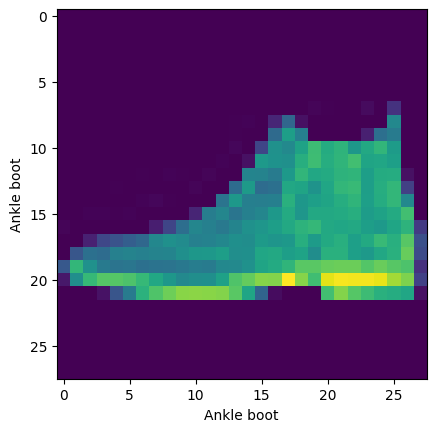

[6.2369311e-01 5.0460534e-07 9.9880022e-01 2.4860646e-04 6.9424999e-01
 4.0597632e-04 8.7636769e-01 4.7553790e-06 4.8017455e-03 3.1761556e-06]


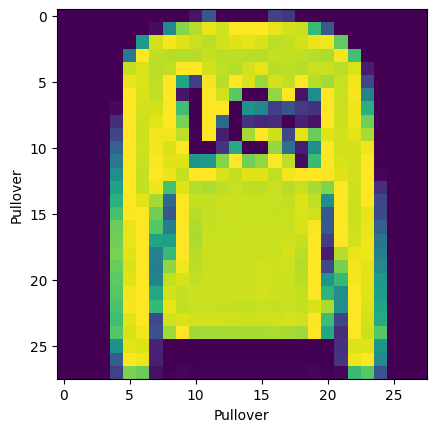

[8.0476665e-01 9.9997687e-01 9.7709913e-03 1.1098590e-01 6.8365090e-02
 1.8285097e-06 3.6609113e-01 5.6788296e-04 4.3120934e-04 3.3341071e-06]


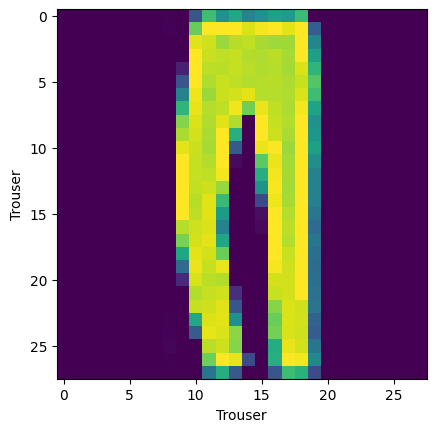

[1.0846635e-01 9.9999779e-01 2.6443780e-03 9.0231431e-01 4.6574403e-02
 3.1456739e-06 1.4400953e-01 4.0708393e-05 5.5303346e-05 2.9655671e-06]


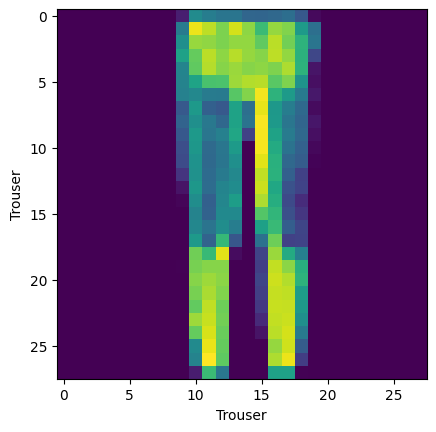

[9.7795290e-01 5.3024343e-07 5.0333369e-01 1.0214343e-01 2.9208419e-01
 1.9658861e-05 9.9299127e-01 2.2050497e-06 6.2934858e-05 1.1473255e-06]


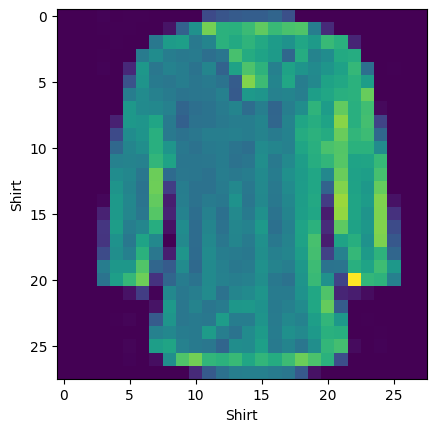

[6.0443616e-01 9.9970013e-01 9.8847240e-02 6.8395868e-02 2.6859191e-01
 6.2136187e-06 4.4464359e-01 3.4940045e-04 1.4374289e-03 4.8437992e-06]


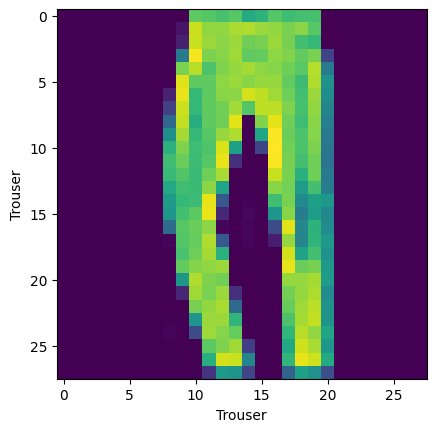

[1.2108466e-02 4.2764550e-06 9.8537028e-01 6.6083029e-04 9.9974191e-01
 1.3362527e-03 4.4304466e-01 7.0012138e-06 2.0780539e-04 7.0001931e-08]


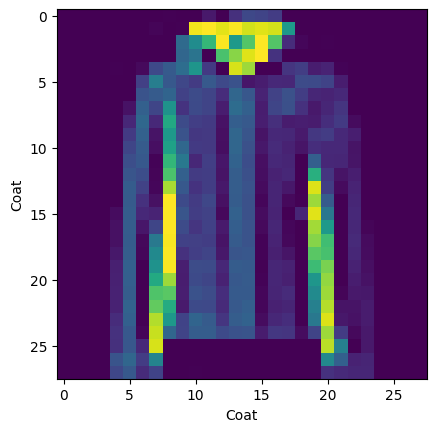

[5.3076558e-02 1.1219017e-06 4.4463515e-01 1.2373868e-03 6.9430810e-01
 1.5733084e-03 9.9880344e-01 4.1550738e-06 2.9960494e-03 5.2653115e-07]


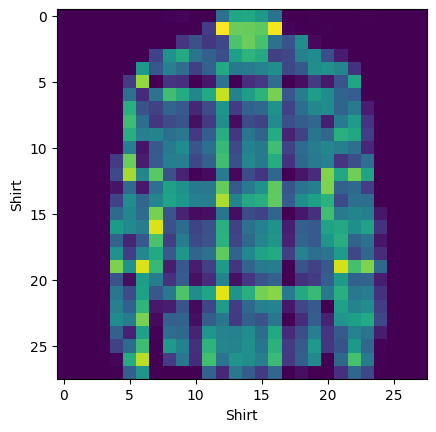

[4.0308428e-03 1.3733150e-07 2.9898991e-05 1.4121906e-04 3.9156414e-05
 9.9973804e-01 2.4755046e-02 1.2950149e-03 2.6353671e-05 5.7834413e-08]


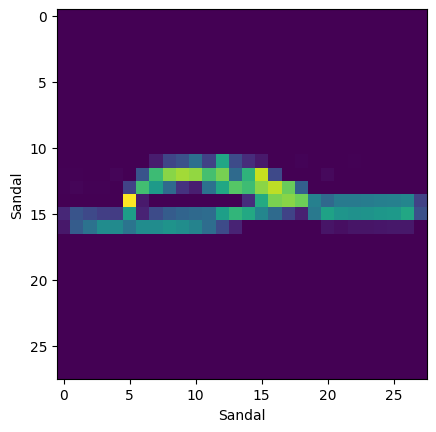

[1.8386485e-05 7.2595060e-07 4.6371471e-07 1.0752240e-04 3.8115519e-07
 1.8075223e-01 1.6037717e-05 9.9939072e-01 2.1053916e-03 2.0092244e-01]


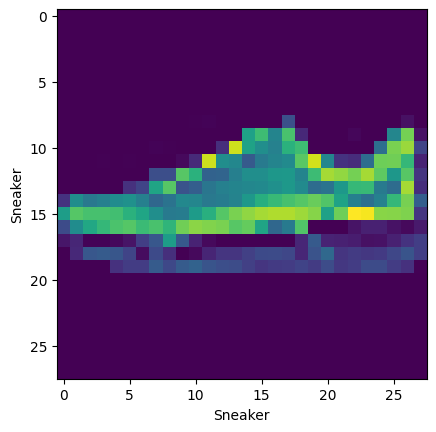

[3.9060868e-02 6.7485271e-05 9.7138238e-01 2.8864361e-04 9.9567872e-01
 6.8350101e-04 9.4416034e-01 4.9621849e-05 1.3052381e-03 6.2749541e-06]


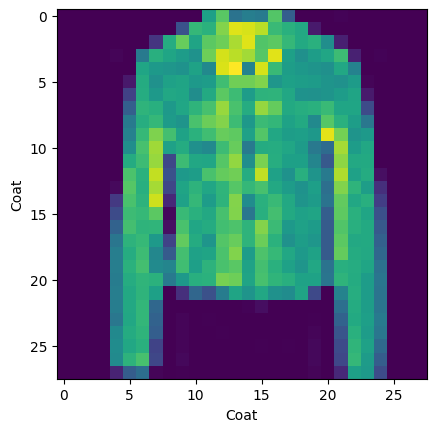

[1.0578033e-03 3.2428062e-08 6.9692032e-05 3.5432964e-03 2.1854838e-04
 9.9900168e-01 9.6628619e-03 7.5270915e-03 2.1415756e-03 5.2495452e-05]


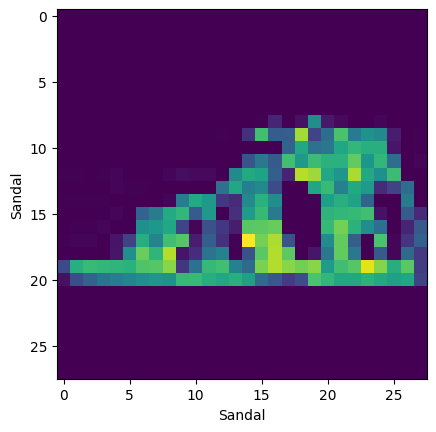

[6.6362707e-05 2.0875559e-06 1.3180421e-05 9.8481833e-04 2.3812886e-06
 2.9717162e-01 9.8747250e-06 6.9358802e-01 2.7566737e-02 1.9456625e-06]


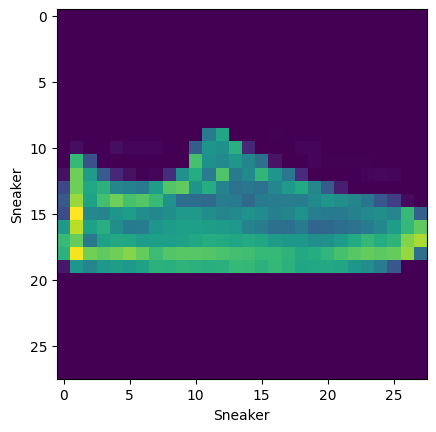

[2.7388383e-02 2.5982735e-01 4.0895957e-03 9.9462759e-01 4.9983771e-03
 6.2227620e-05 1.0795987e-03 3.5677986e-05 1.2017756e-01 2.4483621e-04]


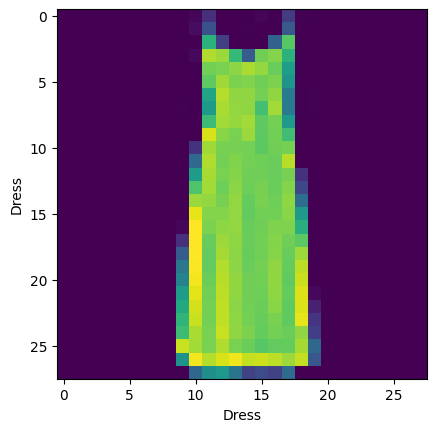

[1.0126197e-01 2.5126323e-04 9.1189772e-01 3.4089841e-02 9.7743648e-01
 6.7383990e-05 5.2934253e-01 1.2116648e-05 6.3491714e-01 5.3937219e-07]


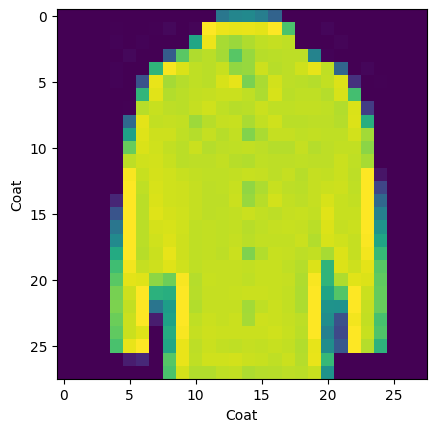

[9.6655756e-02 9.9998134e-01 6.9794063e-03 9.3316609e-01 1.6745511e-01
 9.1561715e-06 5.8687024e-02 4.4579101e-05 1.7806938e-03 4.0169025e-06]


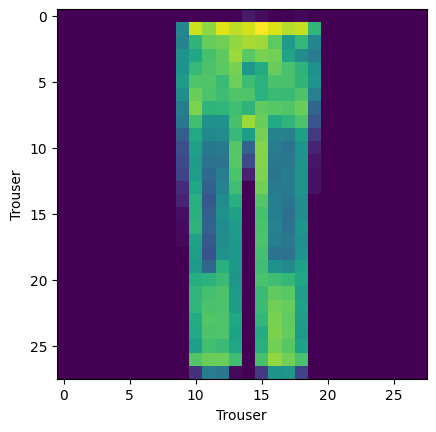

[4.5659301e-01 3.2935136e-06 9.9848652e-01 2.8782235e-03 7.5096440e-01
 1.1259062e-04 9.7506678e-01 4.2370489e-06 8.8283350e-04 1.9030207e-05]


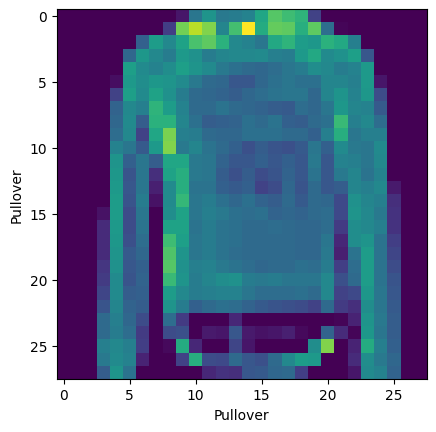

[3.9371192e-01 1.3942608e-06 9.9005097e-01 2.0696004e-03 8.9346552e-01
 7.5447315e-05 8.2550669e-01 1.2659632e-05 7.2257295e-02 3.2245829e-05]


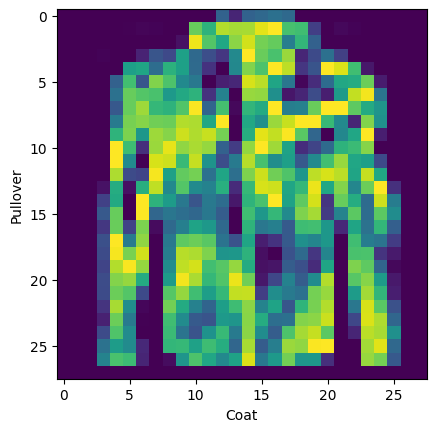

[1.00676315e-02 1.14708273e-04 5.96786812e-02 1.17032146e-02
 1.10496546e-03 5.37008978e-02 5.09452000e-02 1.23260289e-01
 9.99889910e-01 7.47468183e-03]


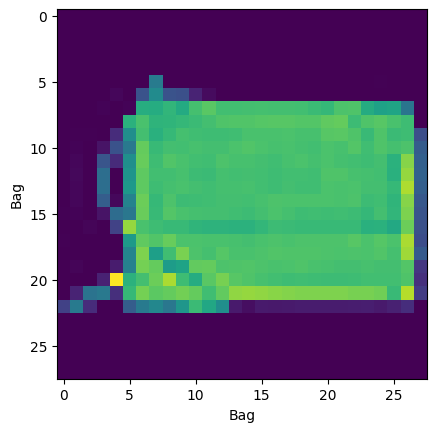

[9.98183131e-01 2.12687693e-04 2.03607976e-01 1.51858121e-01
 1.23171575e-01 1.80193147e-05 9.67554092e-01 2.33346941e-06
 6.96145056e-04 2.34907548e-05]


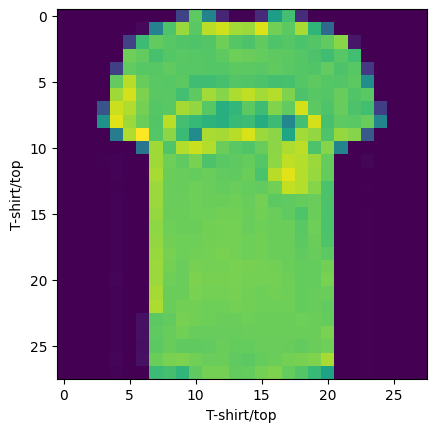

In [283]:

for i in range(len(prediction)):
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i]])
    plt.ylabel(class_names[np.argmax(prediction[i])])
    print(prediction[i])

    plt.show()

